In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

data = pd.read_csv('Mall_Customers.csv')
X = data.iloc[:, [3, 4]].values

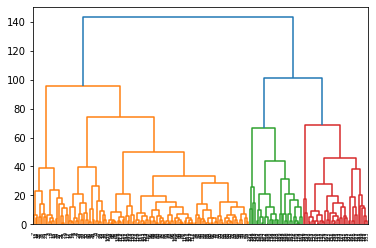

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg = agg_clustering.fit_predict(X)
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

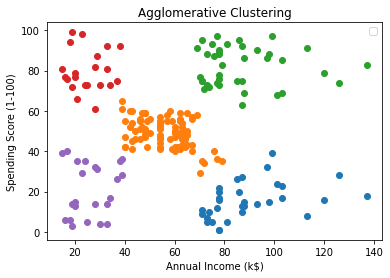

In [ ]:
plt.scatter(X[y_agg == 0, 0], X[y_agg == 0, 1])
plt.scatter(X[y_agg == 1, 0], X[y_agg == 1, 1])
plt.scatter(X[y_agg == 2, 0], X[y_agg == 2, 1])
plt.scatter(X[y_agg == 3, 0], X[y_agg == 3, 1])
plt.scatter(X[y_agg == 4, 0], X[y_agg == 4, 1])
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

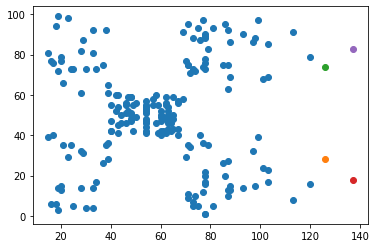

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_Customers.csv')
X = data.iloc[:, [3, 4]].values

def agglomerative_clustering(X, n_clusters, linkage='single'):
    n_samples = X.shape[0]
    distances = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            distance = np.linalg.norm(X[i] - X[j])
            distances[i,j] = distance
            distances[j,i] = distance


    clusters = [[i] for i in range(n_samples)]

    if linkage == 'single':
        linkage_fn = np.min
    elif linkage == 'complete':
        linkage_fn = np.max
    elif linkage == 'average':
        linkage_fn = np.mean

    while len(clusters) > n_clusters:
        cluster_distances = np.zeros((len(clusters), len(clusters)))
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distances_ij = []
                for k in range(len(clusters[i])):
                    for l in range(len(clusters[j])):
                        distances_ij.append(distances[clusters[i][k], clusters[j][l]])
                cluster_distances[i,j] = linkage_fn(distances_ij)
                cluster_distances[j,i] = cluster_distances[i,j]


        i, j = np.unravel_index(cluster_distances.argmin(), cluster_distances.shape)
        clusters[i].extend(clusters[j])
        del clusters[j]


    labels = np.zeros(n_samples, dtype=int)
    for i, cluster in enumerate(clusters):
        for j in cluster:
            labels[j] = i

    return labels

y_agg = agglomerative_clustering(X, n_clusters=5)

plt.scatter(X[y_agg == 0, 0], X[y_agg == 0, 1])
plt.scatter(X[y_agg == 1, 0], X[y_agg == 1, 1])
plt.scatter(X[y_agg == 2, 0], X[y_agg == 2, 1])
plt.scatter(X[y_agg == 3, 0], X[y_agg == 3, 1])
plt.scatter(X[y_agg == 4, 0], X[y_agg == 4, 1])
